# Part 1: Optimising functions
    
In this lab we will play with some of the optimisation methods we learned in the lecture by exploring how they work on some analytic functions (both convex and non-convex).

In [1]:
import torch
import torch.optim as optim

## A Simple Function

For this first task, we are going to try to optimise the following using Stochastic Gradient Descent:

\begin{equation}
min_{\textbf{x}} (\textbf{x}[0] - 5)^2 + \textbf{x}[1]^2 + (\textbf{x}[2] - 1)^2\; ,
\end{equation}

Use the following block the write down the analytic minima of the above function:

In [ ]:
# YOUR CODE HERE

# 超参数



### Implement the function

First, complete the following code block to implement the above function using PyTorch:

In [7]:

# 定义目标函数
def function(x):
    return (x[0] - 5) ** 2 + x[1] ** 2 + (x[2] - 1) ** 2



### Optimising

We need two more things before we can start optimising.
We need our initial guess - which we've set to [2.0, 1.0, 10.0] and we need to how many epochs to take.

In [3]:
p = torch.tensor([2.0, 1.0, 10.0], requires_grad=True)
epochs = 5000

We define the optimisation loop in the standard way:

In [8]:
opt = optim.SGD([p], lr=0.001)

for i in range(epochs):
    opt.zero_grad()
    output = function(p)
    output.backward()
    opt.step()

Use the following block to print out the final value of `p`. Does it match the value you expected?

In [10]:
# YOUR CODE HERE
print(p)


tensor([4.9999e+00, 2.0203e-09, 1.0000e+00], requires_grad=True)


## Visualising Himmelblau's Function

We'll now have a go at a more complex example, which we also visualise, with multiple optima; [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function). This is defined as:

\begin{equation}
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2\; ,
\end{equation}
and has minima at
\begin{equation}
f(3, 2) = f(-2.805118, 3.131312) = f(-3.779310, -3.283186) = f(3.584428, -1.848126) = 0\; .
\end{equation}

Use the following block to first define the function (the inputs $x, y$ are packed into a vector as for the previous quadratic function above):

In [11]:
def himm(x):
    # YOUR CODE HERE

    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

The following will plot its surface:

<ipython-input-12-2eac1c37e83f>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  z = himm(torch.tensor([x, y])).numpy()


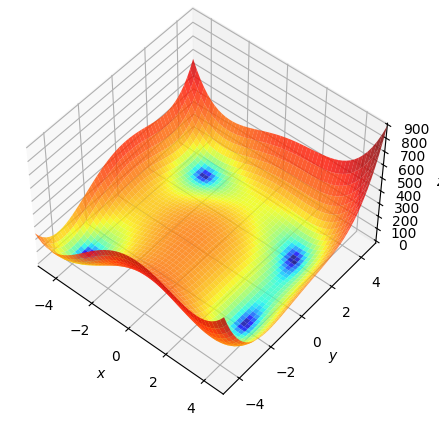

In [12]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = himm(torch.tensor([x, y])).numpy()

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

Check that the above plot looks correct  by comparing to the picture on the [Wikipedia page](https://en.wikipedia.org/wiki/Himmelblau%27s_function).

### Optimising

Let's see how it looks for a few different optimisers from a range of starting points

(-5.0, 5.0)

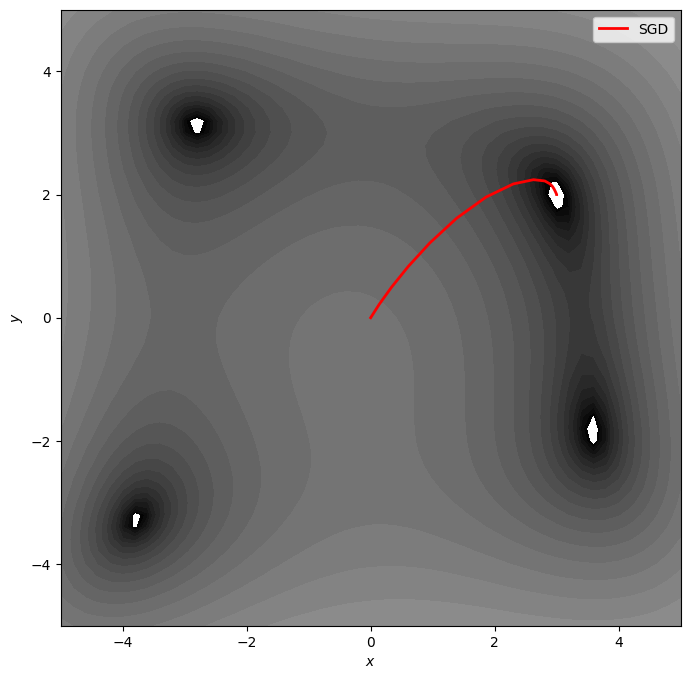

In [13]:
xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = himm(torch.tensor([x, y])).numpy()

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

p = torch.tensor([[0.0],[0.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)

path = np.empty((2,0))
path = np.append(path, p.data.numpy(), axis=1)

for i in range(50):
    opt.zero_grad()
    output = himm(p)
    output.backward()
    opt.step()
    path = np.append(path, p.data.numpy(), axis=1)

ax.plot(path[0], path[1], color='red', label='SGD', linewidth=2)

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

Use the following block to run SGD with momentum (lr=0.01, momentum=0.9) from the same initial point, saving the position at each timestep into a variable called `path_mom`.

In [26]:
# YOUR CODE HERE
p = torch.tensor([[0.0], [0.0]], requires_grad=True)
opt =optim.SGD([p],lr=0.01,momentum=0.9)
path_mom = np.empty((2,0))
path_mom = np.append(path_mom,p.data.numpy(),axis=1)
for i in range(50):
    opt.zero_grad()  # 清空梯度
    output = himm(p)  # 计算目标函数值
    output.backward()  # 计算梯度
    opt.step()  # 更新参数
    print(f"Step {i}, p: {p.data.numpy()}")  # 输出优化过程
    path_mom = np.append(path_mom, p.data.numpy(), axis=1)  # 记录路径
    print("Path shape:", path_mom.shape)  # 应该是 (2, 50) 或类似的形状


Step 0, p: [[0.14]
 [0.22]]
Path shape: (2, 2)
Step 1, p: [[0.46249023]
 [0.69315004]]
Path shape: (2, 3)
Step 2, p: [[1.0605881]
 [1.4887819]]
Path shape: (2, 4)
Step 3, p: [[2.0291145]
 [2.5942838]]
Path shape: (2, 5)
Step 4, p: [[3.2136667]
 [3.4924262]]
Path shape: (2, 6)
Step 5, p: [[3.7490375]
 [3.0694015]]
Path shape: (2, 7)
Step 6, p: [[3.1889994]
 [1.8086251]]
Path shape: (2, 8)
Step 7, p: [[2.5709653 ]
 [0.69341683]]
Path shape: (2, 9)
Step 8, p: [[ 2.4738646 ]
 [-0.12682599]]
Path shape: (2, 10)
Step 9, p: [[ 2.9721227 ]
 [-0.78778774]]
Path shape: (2, 11)
Step 10, p: [[ 3.8399189]
 [-1.430936 ]]
Path shape: (2, 12)
Step 11, p: [[ 4.2877564]
 [-2.119727 ]]
Path shape: (2, 13)
Step 12, p: [[ 3.7521665]
 [-2.6939323]]
Path shape: (2, 14)
Step 13, p: [[ 3.1321905]
 [-2.7863674]]
Path shape: (2, 15)
Step 14, p: [[ 2.9944036]
 [-2.3558128]]
Path shape: (2, 16)
Step 15, p: [[ 3.3652508]
 [-1.7350072]]
Path shape: (2, 17)
Step 16, p: [[ 3.9013162]
 [-1.1914207]]
Path shape: (2, 18)

The following will plot the path taken when momentum was used, as well as the original plain SGD path:

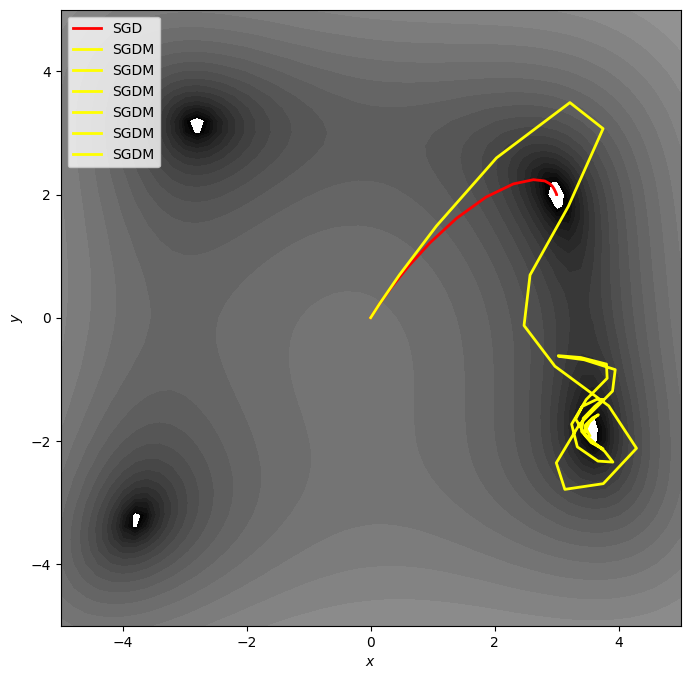

In [27]:
ax.plot(path_mom[0], path_mom[1], color='yellow', label='SGDM', linewidth=2)
ax.legend()
fig

Now explore what happens when you start from different points. What effect do you get with different optimisers?

In [28]:
# YOUR CODE HERE
p=torch.tensor([[0.0],[0.0]],requires_grad=True)
opt=optim.Adam([p],lr=0.01)
path_adam=np.empty((2,0))
path_adam=np.append(path_adam,p.data.numpy(),axis=1)
for i in range(50):
    opt.zero_grad()
    output=himm(p)
    output.backward()
    opt.step()
    path_adam=np.append(path_adam,p.data.numpy(),axis=1)
    print(f"Step {i}, p: {p.data.numpy()}")


Step 0, p: [[0.01]
 [0.01]]
Step 1, p: [[0.0200066 ]
 [0.02000288]]
Step 2, p: [[0.03002396]
 [0.03001051]]
Step 3, p: [[0.04005603]
 [0.04002467]]
Step 4, p: [[0.05010658]
 [0.05004713]]
Step 5, p: [[0.06017919]
 [0.06007956]]
Step 6, p: [[0.07027723]
 [0.07012358]]
Step 7, p: [[0.08040392]
 [0.08018078]]
Step 8, p: [[0.09056225]
 [0.09025263]]
Step 9, p: [[0.10075507]
 [0.10034057]]
Step 10, p: [[0.11098499]
 [0.11044595]]
Step 11, p: [[0.12125449]
 [0.12057006]]
Step 12, p: [[0.13156585]
 [0.13071412]]
Step 13, p: [[0.14192119]
 [0.14087927]]
Step 14, p: [[0.15232244]
 [0.1510666 ]]
Step 15, p: [[0.16277139]
 [0.1612771 ]]
Step 16, p: [[0.17326964]
 [0.1715117 ]]
Step 17, p: [[0.18381867]
 [0.18177125]]
Step 18, p: [[0.19441977]
 [0.19205654]]
Step 19, p: [[0.20507413]
 [0.20236829]]
Step 20, p: [[0.21578278]
 [0.21270716]]
Step 21, p: [[0.22654659]
 [0.22307374]]
Step 22, p: [[0.23736633]
 [0.23346852]]
Step 23, p: [[0.24824266]
 [0.24389197]]
Step 24, p: [[0.25917608]
 [0.25434446

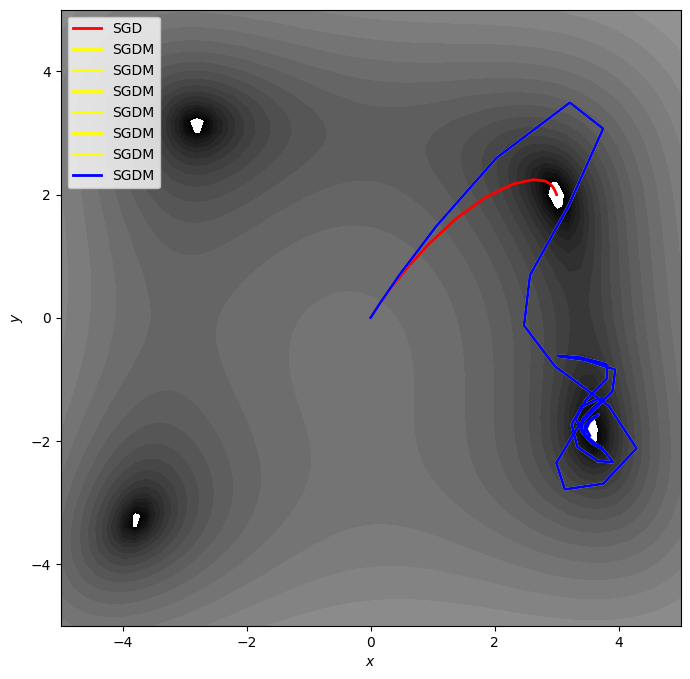

In [29]:
ax.plot(path_mom[0], path_mom[1], color='blue', label='SGDM', linewidth=2)
ax.legend()
fig